-----------------------------------------

Data Selection
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  

---------------------------------------------

Before Handling Missing Values

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0

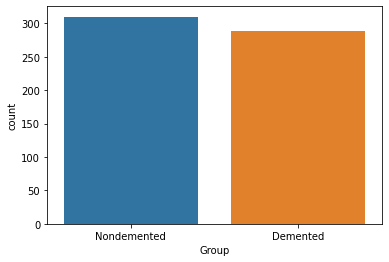

In [1]:
#import packages-----------------------------------------------
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

#1.data slection---------------------------------------------------
dataframe=pd.read_csv("dataset2.csv")
print("-----------------------------------------")
print()
print("Data Selection")
print(dataframe.head())
print()


#2.pre processing--------------------------------------------------
#checking  missing values 
print("---------------------------------------------")
print()
print("Before Handling Missing Values")
print()
print(dataframe.isnull().sum())
print() 

#replace the missing values by 0
median = dataframe['MMSE'].median()
dataframe['MMSE'].fillna(median, inplace=True)
print("-----------------------------------------------")
print("After Handling Missing Values")
print("1.Remove missing values in MMSE------------")
print()
print(dataframe.isnull().sum())
print()

median = dataframe['SES'].median()
dataframe['SES'].fillna(median, inplace=True)
print("-----------------------------------------------")
print()
print("2.Remove missing values in SES------------")
print(dataframe.isnull().sum())
print()


#visulaization---------------------------------------------------
dataframe['Group'] = dataframe['Group'].replace(['Converted'], ['Demented'])
dataframe['Group'] = dataframe['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=dataframe)

#label encoding
#Encode columns into numeric
print("------------------------------------------------------")
print()
print("Before Label Encoding")
print()
print(dataframe['Group'].head())
label_encoder = preprocessing.LabelEncoder() 
print("------------------------------------------------------")
print()
print("After Label Encoding")
print()
dataframe['Group']= label_encoder.fit_transform(dataframe['Group'])
print(dataframe['Group'].head()) 
dataframe['M/F']= label_encoder.fit_transform(dataframe['M/F']) 
dataframe['Hand'] = label_encoder.fit_transform(dataframe['Hand'])


#3.data splitting--------------------------------------------------
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']


X = dataframe[feature_col_names].values
y = dataframe[predicted_class_names].values

#spliting the x and y into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


#4.classification algorithms------------------------------------------
#svm
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
pred = svm.predict(X_test)

#confusion matrix
print("-----------------------------------------------------")
print("Performance Metrics")
cm1=confusion_matrix(y_test,pred)
print()
print("1.Confusion Matrix",cm1)
print()

#find the performance metrics 
TP = cm1[0][0]
FP = cm1[0][1]
FN = cm1[1][0]
TN = cm1[1][1]

#Total TP,TN,FP,FN
Total=TP+FP+FN+TN

#Accuracy Calculation
accuracy1=((TP+TN)/Total)*100
print("2.Accuracy",accuracy1,'%')
print()

#Precision Calculation
precision=TP/(TP+FP)*100
print("3.Precision",precision,'%')
print()

#Sensitivity Calculation
Sensitivity=TP/(TP+FN)*100
print("4.Sensitivity",Sensitivity,'%')
print()

#specificity Calculation
specificity = (TN / (TN+FP))*100
print("5.specificity",specificity,'%')
print()



#predict the disease 

if y[0]== 0:
    print("------------------------------")
    print('\n Non Dementia ')
    print("------------------------------")
else:
    print("------------------------------")
    print('\n Demtia ')
    print("------------------------------")



In [2]:
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

#1.data slection---------------------------------------------------
dataframe=pd.read_csv("dataset2.csv")
print("-----------------------------------------")
print()
print("Data Selection")
print(dataframe.head())
print()

-----------------------------------------

Data Selection
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  



In [3]:
#2.pre processing--------------------------------------------------
#checking  missing values 
print("---------------------------------------------")
print()
print("Before Handling Missing Values")
print()
print(dataframe.isnull().sum())
print() 

---------------------------------------------

Before Handling Missing Values

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           29
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64



In [4]:
#replace the missing values by 0
median = dataframe['MMSE'].median()
dataframe['MMSE'].fillna(median, inplace=True)
print("-----------------------------------------------")
print("After Handling Missing Values")
print("1.Remove missing values in MMSE------------")
print()
print(dataframe.isnull().sum())
print()

29.0
-----------------------------------------------
After Handling Missing Values
1.Remove missing values in MMSE------------

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           29
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64



In [4]:
median = dataframe['SES'].median()
print(dataframe['SES'].median())
dataframe['SES'].fillna(median, inplace=True)
print("-----------------------------------------------")
print()
print("2.Remove missing values in SES------------")
print(dataframe.isnull().sum())
print()

2.0
-----------------------------------------------

2.Remove missing values in SES------------
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64



0      Nondemented
1      Nondemented
2         Demented
3         Demented
4         Demented
          ...     
593       Demented
594       Demented
595       Demented
596    Nondemented
597    Nondemented
Name: Group, Length: 598, dtype: object


<AxesSubplot:xlabel='Group', ylabel='count'>

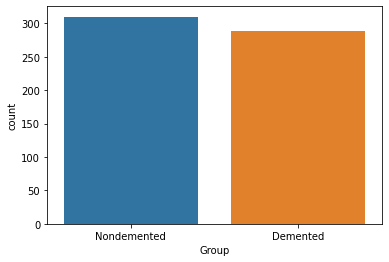

In [7]:
dataframe['Group'] = dataframe['Group'].replace(['Converted'], ['Demented'])
dataframe['Group'] = dataframe['Group'].replace(['Converted'], ['Demented'])
print(dataframe['Group'])
sns.countplot(x='Group', data=dataframe)

In [5]:
print("------------------------------------------------------")
print()
print("Before Label Encoding")
print()
print(dataframe['Group'].head())
label_encoder = preprocessing.LabelEncoder() 
print("------------------------------------------------------")
print()
print("After Label Encoding")
print()
dataframe['Group']= label_encoder.fit_transform(dataframe['Group'])
print(dataframe['Group'].head()) 
dataframe['M/F']= label_encoder.fit_transform(dataframe['M/F']) 
dataframe['Hand'] = label_encoder.fit_transform(dataframe['Hand'])

------------------------------------------------------

Before Label Encoding

0    Nondemented
1    Nondemented
2       Demented
3       Demented
4       Demented
Name: Group, dtype: object
------------------------------------------------------

After Label Encoding

0    2
1    2
2    1
3    1
4    1
Name: Group, dtype: int32


In [10]:
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']


X = dataframe[feature_col_names].values
y = dataframe[predicted_class_names].values

#spliting the x and y into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [11]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
pred = svm.predict(X_test)

#confusion matrix
print("-----------------------------------------------------")
print("Performance Metrics")
cm1=confusion_matrix(y_test,pred)
print()
print("1.Confusion Matrix",cm1)
print()
print(cm1)

#find the performance metrics 
TP = cm1[0][0]
FP = cm1[0][1]
FN = cm1[1][0]
TN = cm1[1][1]

-----------------------------------------------------
Performance Metrics

1.Confusion Matrix [[50 17]
 [11 72]]

[[50 17]
 [11 72]]


In [ ]:
Total=TP+FP+FN+TN

#Accuracy Calculation
accuracy1=((TP+TN)/Total)*100
print("2.Accuracy",accuracy1,'%')
print()

#Precision Calculation
precision=TP/(TP+FP)*100
print("3.Precision",precision,'%')
print()

#Sensitivity Calculation
Sensitivity=TP/(TP+FN)*100
print("4.Sensitivity",Sensitivity,'%')
print()

#specificity Calculation
specificity = (TN / (TN+FP))*100
print("5.specificity",specificity,'%')
print()



#predict the disease 

if y[0]== 0:
    print("------------------------------")
    print('\n Non Dementia ')
    print("------------------------------")
else:
    print("------------------------------")
    print('\n Demtia ')
    print("------------------------------")